<a href="https://colab.research.google.com/github/jmlucasusc4/Cluster_Project/blob/main/Clusterproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('/content/employee-compensation.csv')

### Reading Data File

In [ ]:
data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [ ]:
data.shape

(683277, 22)

In [ ]:
data.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,683277.000000,683277.000000,682926.000000,6.832770e+05,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000
mean,2.977943,2016.364632,492.532173,1.708711e+07,69466.271313,5474.598046,3820.481201,78571.040544,13658.900273,9946.864621,5038.753940,28644.518833,107215.559377
std,1.579574,2.092180,330.911187,1.925902e+07,47771.799981,13110.029734,8386.602694,55751.218659,10110.075388,5732.982236,3787.981426,17869.713199,72291.710218
min,1.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2.000000,2015.000000,250.000000,2.545000e+04,29009.540000,0.000000,0.000000,31676.040000,4662.960000,4780.680000,1870.410000,11716.230000,44439.440000
50%,2.000000,2017.000000,535.000000,5.097500e+04,67899.360000,0.000000,706.240000,74870.420000,13858.160000,12500.590000,4876.550000,32521.370000,107529.240000
75%,4.000000,2018.000000,790.000000,3.737703e+07,100416.890000,4223.390000,4362.880000,112666.100000,20151.850000,14037.160000,7525.560000,40915.930000,154170.540000
max,7.000000,2020.000000,990.000000,4.434643e+07,651936.710000,321523.310000,568163.120000,658867.570000,121952.520000,59405.230000,36815.390000,151645.180000,807625.250000


In [ ]:
missing_values= data.isna().sum()
missing_values

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [ ]:
data=data.dropna()

### Check for Missing Data

In [ ]:
missing_values= data.isna().sum()
missing_values

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [ ]:
data.drop('Other Salaries',axis='columns',inplace=True)

In [ ]:
data.drop('Salaries',axis='columns',inplace=True)

In [ ]:
data.drop('Organization Group',axis='columns',inplace=True)

In [ ]:
data.drop('Year Type',axis='columns',inplace=True)

In [ ]:
data['Total Benefits']=data['Retirement']+data['Health and Dental']+data['Other Benefits']

In [ ]:
data.drop('Total Benefits',axis='columns',inplace=True)

In [ ]:
data

,Organization Group Code,Job Family Code,Job Code,Year,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Compensation
0,1,1000,1021,2013,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,0.0,57534.65,11253.16,11961.34,4532.63,85281.78
1,1,1000,1023,2013,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,0.0,57678.50,10284.88,7176.80,4755.14,79895.32
2,1,1000,1031,2013,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,0.0,63532.93,12495.83,12918.24,4702.71,93649.71
3,1,1000,1054,2013,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,0.0,94215.92,19644.45,12918.24,7458.76,134237.37
4,1,1000,1062,2013,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,0.0,5084.00,1083.90,956.91,387.50,7512.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683272,6,4300,4334,2020,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",Revenue,"Investigator, Tax Collector",43836214,0.0,98444.94,20540.24,15275.18,8019.49,142279.85
683273,6,4300,4334,2020,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",Revenue,"Investigator, Tax Collector",43966403,0.0,9416.71,1904.43,1468.77,743.51,13533.42
683274,6,4300,4334,2020,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",Revenue,"Investigator, Tax Collector",44016180,0.0,97051.00,20241.56,14100.16,7897.00,139289.72
683275,6,4300,4337,2020,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",Revenue,"Pr Investigator, Tax Collector",42423439,0.0,115943.00,24188.37,15275.18,9018.34,164424.89


In [ ]:
cols=data.columns
for I in cols :

  print(I,'has',data[I].nunique(),'uniquevalues')

Organization Group Code has 7 uniquevalues
Job Family Code has 59 uniquevalues
Job Code has 1210 uniquevalues
Year has 8 uniquevalues
Department Code has 60 uniquevalues
Department has 109 uniquevalues
Union Code has 70 uniquevalues
Union has 129 uniquevalues
Job Family has 59 uniquevalues
Job has 1348 uniquevalues
Employee Identifier has 309658 uniquevalues
Overtime has 261976 uniquevalues
Total Salary has 614930 uniquevalues
Retirement has 451568 uniquevalues
Health and Dental has 209844 uniquevalues
Other Benefits has 496051 uniquevalues
Total Compensation has 658354 uniquevalues


In [ ]:
df= data.select_dtypes(include=('int64','float64'))
df.head()

,Organization Group Code,Year,Union Code,Employee Identifier,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Compensation
0,1,2013,21.0,37730,0.0,57534.65,11253.16,11961.34,4532.63,85281.78
1,1,2013,21.0,26574,0.0,57678.50,10284.88,7176.80,4755.14,79895.32
2,1,2013,21.0,8148,0.0,63532.93,12495.83,12918.24,4702.71,93649.71
3,1,2013,21.0,27436,0.0,94215.92,19644.45,12918.24,7458.76,134237.37
4,1,2013,21.0,37730,0.0,5084.00,1083.90,956.91,387.50,7512.31


###Plot the Correlation

In [ ]:
corr=df.corr()
corr

,Organization Group Code,Year,Union Code,Employee Identifier,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Compensation
Organization Group Code,1.000000,-0.000739,-0.007622,-0.000127,-0.297148,-0.263737,-0.234043,-0.226596,0.033051,-0.252369
Year,-0.000739,1.000000,0.005062,0.838864,0.080819,0.124209,0.100283,0.161265,0.102378,0.127971
Union Code,-0.007622,0.005062,1.000000,0.006612,0.059536,-0.048236,-0.108699,-0.105931,-0.325772,-0.077875
Employee Identifier,-0.000127,0.838864,0.006612,1.000000,0.081682,0.128231,0.103564,0.173667,0.094212,0.132088
Overtime,-0.297148,0.080819,0.059536,0.081682,1.000000,0.501851,0.311004,0.299711,0.091801,0.459111
Total Salary,-0.263737,0.124209,-0.048236,0.128231,0.501851,1.000000,0.928025,0.745272,0.652867,0.994322
Retirement,-0.234043,0.100283,-0.108699,0.103564,0.311004,0.928025,1.000000,0.782658,0.677758,0.953149
Health and Dental,-0.226596,0.161265,-0.105931,0.173667,0.299711,0.745272,0.782658,1.000000,0.626676,0.796369
Other Benefits,0.033051,0.102378,-0.325772,0.094212,0.091801,0.652867,0.677758,0.626676,1.000000,0.700391
Total Compensation,-0.252369,0.127971,-0.077875,0.132088,0.459111,0.994322,0.953149,0.796369,0.700391,1.000000


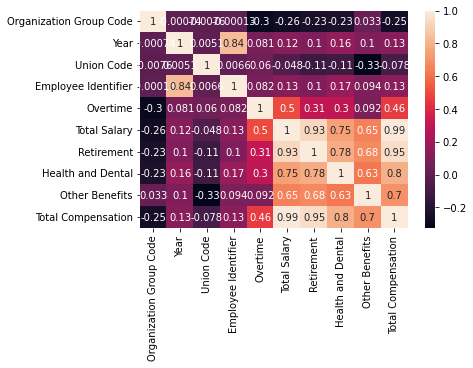

In [ ]:
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
df.columns

Index(['Organization Group Code', 'Year', 'Union Code', 'Employee Identifier',
       'Overtime', 'Total Salary', 'Retirement', 'Health and Dental',
       'Other Benefits', 'Total Compensation'],
      dtype='object')

In [ ]:
df=df.drop(['Organization Group Code','Year','Union Code','Employee Identifier','Overtime','Retirement', 'Health and Dental','Other Benefits'],axis=1)

### Preparing Data for Plotting

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist,cdist

In [ ]:
distortions=[]
inertias=[]
mapping1={}
mapping2={}
K=range(2,10)
for i in K :
  KMeans_model=KMeans(n_clusters=i).fit(df)
  KMeans_model.fit(df)
  distortions.append(sum(np.min(cdist(df, KMeans_model.cluster_centers_,
                                        'euclidean'), axis=1)) / df.shape[0])
  inertias.append(KMeans_model.inertia_)
 
  mapping1[i] = sum(np.min(cdist(df, KMeans_model.cluster_centers_,
                                   'euclidean'), axis=1)) / df.shape[0]
  mapping2[i] = KMeans_model.inertia_

In [ ]:
for key, val in mapping1.items():
  print(f'{key}:{val}')

2:45879.5494791903
3:28112.642612750784
4:22108.35658752235
5:18141.301632504423
6:15873.755561788501
7:13588.848063519585
8:12386.76228154586
9:11133.028048992626


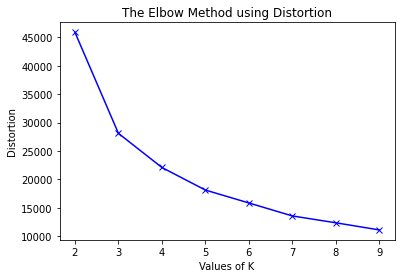

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
Model=KMeans(n_clusters=3)
Model.fit(df)

KMeans(n_clusters=3)

In [ ]:
print(Model.cluster_centers_)

[[ 17370.89488907  24006.72127294]
 [159748.03021567 209077.35626406]
 [ 82633.90990698 116638.44103295]]


In [ ]:
df= data.select_dtypes(include=('int64','float64'))
df.head()

,Organization Group Code,Year,Union Code,Employee Identifier,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Compensation
0,1,2013,21.0,37730,0.0,57534.65,11253.16,11961.34,4532.63,85281.78
1,1,2013,21.0,26574,0.0,57678.50,10284.88,7176.80,4755.14,79895.32
2,1,2013,21.0,8148,0.0,63532.93,12495.83,12918.24,4702.71,93649.71
3,1,2013,21.0,27436,0.0,94215.92,19644.45,12918.24,7458.76,134237.37
4,1,2013,21.0,37730,0.0,5084.00,1083.90,956.91,387.50,7512.31


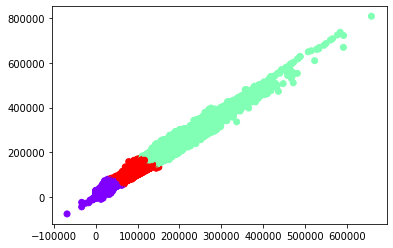

In [ ]:
plt.scatter(df.iloc[:,5].values,df.iloc[:,-1].values, c=Model.labels_, cmap="rainbow")

plt.show()